<a href="https://colab.research.google.com/github/SenolIsci/ML-Model-Starters/blob/main/Composite_multioutput_LSTM_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Composite LSTM Autoencoder (resontruction and prediction)
Finally, we can create a composite LSTM Autoencoder that has a single encoder and two decoders, one for reconstruction and one for prediction.

We can implement this multi-output model in Keras using the functional API. You can learn more about the functional API in this post:

In [198]:
# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(100, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(1))(decoder2)
# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)



[array([[[0.10479933],
        [0.19965686],
        [0.29818776],
        [0.3986583 ],
        [0.49982712],
        [0.6007049 ],
        [0.7009458 ],
        [0.8004361 ],
        [0.8992407 ]]], dtype=float32), array([[[0.16456383],
        [0.28796864],
        [0.40254155],
        [0.50986594],
        [0.611226  ],
        [0.7076813 ],
        [0.8001216 ],
        [0.88930786]]], dtype=float32)]


Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 9, 1)]       0           []                               
                                                                                                  
 lstm_111 (LSTM)                (None, 100)          40800       ['input_17[0][0]']               
                                                                                                  
 repeat_vector_51 (RepeatVector  (None, 9, 100)      0           ['lstm_111[0][0]']               
 )                                                                                                
                                                                                                  
 repeat_vector_52 (RepeatVector  (None, 8, 100)      0           ['lstm_111[0][0]']        

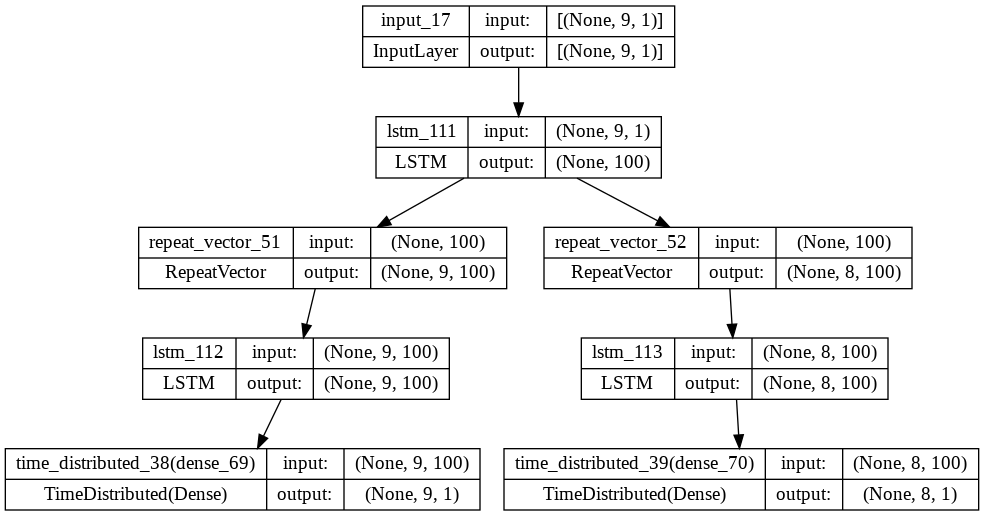

In [199]:
model.summary()
plot_model(model, show_shapes=True)

In [200]:

seq_in

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [201]:
seq_out

array([[[0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [202]:
seq_in.shape

(1, 9, 1)

In [203]:
seq_out.shape

(1, 8, 1)